In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

config = tf.ConfigProto()
config.gpu_options.allow_growth = True


def plot_activity(activity, df):
    data = df[df['label'] == int(activity)][['x', 'y', 'z']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

#mnist = tf.keras.datasets.mnist
data_path=[]
data_path.append('drive/My Drive/ML/thesis/data/16/acelerometro_terra.csv')
data_path.append('drive/My Drive/ML/thesis/data/17/acelerometro_terra.csv')
data_path.append('drive/My Drive/ML/thesis/data/20/acelerometro_terra.csv')
data_path.append('drive/My Drive/ML/thesis/data/21/acelerometro_terra.csv')


RANDOM_SEED = 42
N_TIME_STEPS = 50
N_FEATURES = 3
step = 1
segments_zero = []
labels_zero = []
for f in range(len(data_path)):
    with open(data_path[f],'r') as f:
        reader=pd.read_csv(f,delimiter=',',usecols=['x','y','z','label'])
        mask=(reader['label']!=5)
        
        reader=reader.loc[mask]
        
        mask=(reader['label']!=6)
        reader=reader.loc[mask]
        
    # data=np.array(reader.loc[:,['x','y','z']])
    # label=np.array(reader.iloc[:]['label'])
        for i in range(0, len(reader) - N_TIME_STEPS, step):
          
            xs = reader['x'].values[i: i + N_TIME_STEPS]
            ys = reader['y'].values[i: i + N_TIME_STEPS]
            zs = reader['z'].values[i: i + N_TIME_STEPS]
            label = stats.mode(reader['label'][i: i + N_TIME_STEPS])[0][0]
            
            segments_zero.append([xs, ys, zs])
            labels_zero.append(label)
            
    # reader['label'].value_counts().plot(kind='bar', title='training example by label')
    #
    # plot_activity("3", reader)
    # plt.show()



In [1]:
segments=[]#for removing 0 samples from list
labels=[]
count_zeros=0
# print(np.shape(np.array(segments)))
# print(segments[120])

for i in range(0,len(labels_zero)):
  if(labels_zero[i]!=0 or count_zeros<1470):
    labels.append(labels_zero[i])
    segments.append(segments_zero[i])
    if(labels_zero[i]==0):
      count_zeros+=1
      
print(len(labels_zero))
len(labels)

NameError: ignored

In [0]:
# c=0
# li=[]
# for i,v in enumerate(labels):
#   print(labels)
#   break
#   if np.argmax(labels[i])==0:
#     li.append(i)
# print(li)

print(np.array(segments).shape)
reshaped_segments = np.asarray(segments, dtype= np.float32).transpose([0,2,1])
labels =np.asarray(pd.get_dummies(labels), dtype = np.float32)

#L0=labels[0]
# print(np.array(reshaped_segments))
print(reshaped_segments.shape)
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)#,shuffle=False)

# print(data.shape,label.shape)#(60000,28,28)(60000,)   The dimensions for data are [Batch Size, Sequence Length, Input Dimension]

#########Building the model
N_CLASSES = 5
N_HIDDEN_UNITS = 10

(11347, 3, 50)
(11347, 50, 3)


In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9656445504450788362
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9739666381369793123
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6419296289876156043
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7890964889921764502
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
print(X_train.shape)




# https://keras.io/layers/recurrent/
# initilizer for weights and biases: https://keras.io/initializers/
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,SimpleRNN,GRU
from keras.layers import Dropout
import keras
import tensorflow as tf
from time import time

class TimingCallback(keras.callbacks.Callback):
  def __init__(self,X_test,Y_test):
    self.logs=[]
    self.history=dict(loss_test=[],acc_test=[])
    self.x=X_test
    self.y=Y_test
  
  def on_epoch_begin(self,epoch, logs={}):
    self.starttime=time()
  def on_epoch_end(self,epoch, logs={}):
    self.logs.append(time()-self.starttime)
    loss, acc = self.model.evaluate(self.x, self.y, verbose=0)
    self.history['loss_test'].append(loss)
    self.history['acc_test'].append(acc)
    if((epoch+1)%10==0):
      print('\n----->>Epoch: {}/1000'.format(epoch+1))
      print('Training      loss: {}, acc: {}'.format(logs['loss'],logs['acc']))
      print('Testing       loss: {}, acc: {}\n'.format(loss, acc))



recognizer = Sequential()

recognizer.add(GRU(units = 10,input_shape = (X_train.shape[1],X_train.shape[2]),recurrent_activation='sigmoid'))
keras.initializers.RandomUniform(minval=-1, maxval=1, seed=None)

recognizer.add(Dense(units = 7))

# from IPython.display import SVG,display
# from keras.utils.vis_utils import model_to_dot

# display(SVG(model_to_dot(recognizer,show_layer_names=True,show_shapes =True,rankdir='LR').create(prog='dot', format='svg')))


recognizer.compile(optimizer = 'rmsprop',loss = 'mean_squared_error',metrics=['accuracy'])

print(recognizer.summary())
# with tf.device('/device:GPU:0'):
cb = TimingCallback(X_test,y_test)
history=recognizer.fit(X_train,y_train,epochs = 1000, batch_size = 2048,verbose=0,callbacks=[cb])
times = cb.logs

# scores = recognizer.evaluate(X_test, y_test,epochs = 10, batch_size = 1024, verbose=1)
# print("Accuracy: %.2f%%" % (scores[1]*100))

W0830 06:24:45.888901 139725675485056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 06:24:46.086811 139725675485056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



(7457, 50, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 10)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________
None

----->>Epoch: 10/1000
Training      loss: 0.22709791347098698, acc: 0.13504090196999688
Testing       loss: 0.21743631838484012, acc: 0.13297872343222997


----->>Epoch: 20/1000
Training      loss: 0.16013508105311586, acc: 0.16065441891481078
Testing       loss: 0.15583811207990325, acc: 0.16739674596971504


----->>Epoch: 30/1000
Training      loss: 0.12938319692163122, acc: 0.2204639947680569
Testing       loss: 0.1276325201137791, acc: 0.2193366708385482


----->>Epoch: 40/1000
Training   

KeyboardInterrupt: ignored

In [0]:
!pip install h5py pyyaml

In [0]:
import os
checkpoint_path = os.path.join('drive/My Drive/ML/thesis/','training_1/cp6-19neroun-7class.ckpt')
checkpoint_dir = os.path.dirname(checkpoint_path)
if(not os.path.exists(checkpoint_dir)):
  os.makedirs(checkpoint_dir)
import h5py

# class_weight = {0: 0.015, 1: 1., 2: 1., 3: 1., 4: 1.,
#                 # Set weight "2" for class "5",
#                 # making this class 2x more important
#                 5: 1.5,
#                 6: 1.5, 7: 1.}
# class_weight = {0: 1., 1: 1., 2: 1., 3: 1., 4: 4,
#                 # Set weight "2" for class "5",
#                 # making this class 2x more important
#                 5: 4,
#                 6: 1.}
print('train sets for each event:')
print(np.bincount(np.where(y_train==1)[1]))
print('test sets for each event:')
print(np.bincount(np.where(y_test==1)[1]))


train sets for each event:
[1008  970 1595 1324 1370 1675]
test sets for each event:
[462 443 635 552 607 706]


In [0]:
print(X_train.shape)
from __future__ import absolute_import, division, print_function, unicode_literals

import os




# https://keras.io/layers/recurrent/
# initilizer for weights and biases: https://keras.io/initializers/
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,SimpleRNN,GRU
from keras.layers import Dropout
import keras
import tensorflow as tf
from time import time


def driver_model():
  recognizer = Sequential()

  recognizer.add(GRU(units = 12,input_shape = (X_train.shape[1],X_train.shape[2]),recurrent_activation='sigmoid'))
  # keras.initializers.RandomUniform(minval=-1, maxval=1, seed=None)
#   recognizer.add(GRU(units=10,input_dim=19,recurrent_activation='sigmoid',return_sequences = True))
  Dropout(0.2)
  recognizer.add(Dense(units = 6, activation=tf.keras.activations.softmax))


  recognizer.compile(optimizer = 'rmsprop',loss = 'mean_squared_error',metrics=['accuracy'])
  return recognizer


# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model=driver_model()
# print(model.summary())



model.fit(X_train, y_train, epochs=1000,validation_data=(X_test, y_test), batch_size=1024, callbacks = [cp_callback])#,class_weight=class_weight
	# evaluate model
# model.evaluate(X_test, y_test, batch_size=1024, verbose=1)

(7942, 50, 3)
Train on 7942 samples, validate on 3405 samples
Epoch 1/1000
7942/7942 [==============================] - 2s 224us/step - loss: 0.1390 - acc: 0.1965 - val_loss: 0.1378 - val_acc: 0.2159

Epoch 00001: saving model to drive/My Drive/ML/thesis/training_1/cp6-19neroun-7class.ckpt
Epoch 2/1000
7942/7942 [==============================] - 1s 114us/step - loss: 0.1377 - acc: 0.2191 - val_loss: 0.1368 - val_acc: 0.2470

Epoch 00002: saving model to drive/My Drive/ML/thesis/training_1/cp6-19neroun-7class.ckpt
Epoch 3/1000
7942/7942 [==============================] - 1s 112us/step - loss: 0.1368 - acc: 0.2488 - val_loss: 0.1360 - val_acc: 0.2673

Epoch 00003: saving model to drive/My Drive/ML/thesis/training_1/cp6-19neroun-7class.ckpt
Epoch 4/1000
7942/7942 [==============================] - 1s 113us/step - loss: 0.1359 - acc: 0.2684 - val_loss: 0.1352 - val_acc: 0.2872

Epoch 00004: saving model to drive/My Drive/ML/thesis/training_1/cp6-19neroun-7class.ckpt
Epoch 5/1000
7942/7942

AttributeError: ignored

In [0]:

!ls 'drive/My Drive/ML/thesis/training_1/'

cp2.ckpt  cp3.ckpt  cp4.ckpt  cp.ckpt


In [0]:
model = driver_model()

loss, acc = model.evaluate(X_test, y_test)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))


3196/3196 [==============================] - 3s 825us/step
Untrained model, accuracy: 18.65%


In [0]:
latest = tf.train.latest_checkpoint(checkpoint_path)

model.load_weights(checkpoint_path)

loss, acc = model.evaluate(X_test, y_test)

print("Restored model, accuracy: {:5.2f}%".format(100*acc))

print(latest)
x=np.expand_dims(X_test[40],0)
print(x)
prediction = model.predict(x)
print(np.argmax(prediction[40]),prediction[40],y_test[40])

3196/3196 [==============================] - 2s 699us/step
Restored model, accuracy: 90.21%
None
[[[-1.9172261e+00 -1.4972063e+00  2.1825859e-01]
  [-1.0100858e+00  2.5025174e-02  3.0183795e-01]
  [-4.1435441e-01 -4.7892100e-01  1.2910944e+00]
  [-1.3879783e+00 -1.8896435e+00  1.8805654e+00]
  [-1.7841461e+00 -1.7063085e+00  1.4089512e+00]
  [-1.2711402e+00 -4.1702899e-01  4.5487577e-01]
  [-1.8210719e+00 -1.0507998e+00 -6.2961265e-02]
  [-2.0371292e+00 -6.7584336e-01  1.0420308e+00]
  [-1.5913320e+00 -1.3883741e+00  1.3111149e+00]
  [-1.1634794e+00 -8.6451322e-01  8.4704906e-01]
  [-2.4263692e+00 -2.6172513e-01 -1.4003542e-01]
  [-2.8096561e+00  3.1824777e-01 -4.6471405e-01]
  [-1.9864649e+00  3.3814046e-01  3.9773774e-01]
  [-1.8111761e+00 -2.5720214e-03  3.9781520e-01]
  [-2.6686988e+00  3.3369797e-01 -9.6912168e-02]
  [-2.9028332e+00  1.3707606e+00 -2.8802854e-01]
  [-3.1616664e+00  1.1258155e+00 -7.7327538e-01]
  [-3.3201525e+00  5.4206407e-01 -4.0664738e-01]
  [-2.6361239e+00  1.

IndexError: ignored

0.15663135303110703


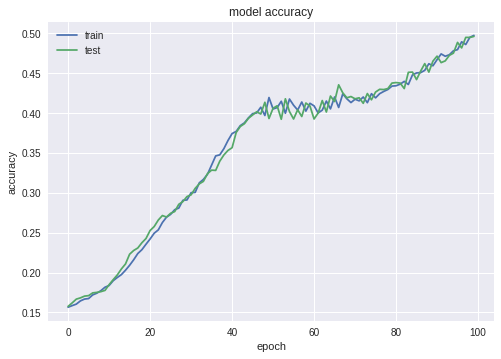

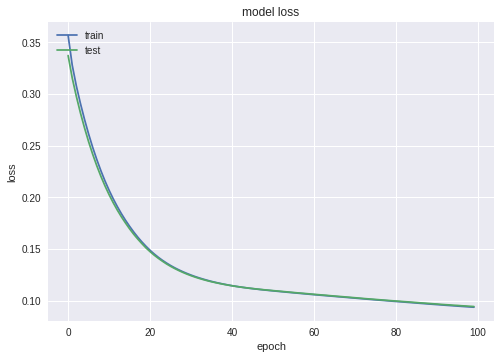

In [0]:
print(history.history['acc'][0])
# summarize history for accuracy
plt.plot(history.history['acc'],"-")
plt.plot(cb.history['acc_test'],"-")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(cb.history['loss_test'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.DataFrame({'train_acc':history.history['acc'],
                   'train_loss':history.history['loss'],
                   'test_acc':cb.history['acc_test'],
                   'test_loss':cb.history['loss_test'],
                  })
 
writer = ExcelWriter('drive/My Drive/ML/thesis/GRU_execute.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()

digraph G {
rankdir=TB;
concentrate=True;
node [shape=record];
140664801572064 [label="simple_rnn_50: SimpleRNN\n|{input:|output:}|{{(None, 50, 3)}|{(None, 3)}}"];
140664801571952 [label="dense_95: Dense\n|{input:|output:}|{{(None, 3)}|{(None, 7)}}"];
140664801572624 -> 140664801572064;
140664801572064 -> 140664801571952;
}



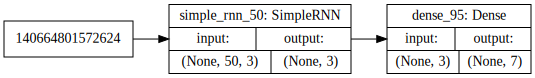

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_50 (SimpleRNN)    (None, 3)                 21        
_________________________________________________________________
dense_95 (Dense)             (None, 7)                 28        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None


KeyboardInterrupt: ignored

In [0]:
# SimpleRNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,SimpleRNN,GRU
from keras.layers import Dropout
import keras
import tensorflow as tf
from time import time

class TimingCallback(keras.callbacks.Callback):
  def __init__(self,X_test,Y_test):
    self.logs=[]
    self.history=dict(loss_test=[],acc_test=[])
    self.x=X_test
    self.y=Y_test
  
  def on_epoch_begin(self,epoch, logs={}):
    self.starttime=time()
  def on_epoch_end(self,epoch, logs={}):
    self.logs.append(time()-self.starttime)
    loss, acc = self.model.evaluate(self.x, self.y, verbose=0)
    self.history['loss_test'].append(loss)
    self.history['acc_test'].append(acc)
    if((epoch+1)%10==0):
      print('\n----->>Epoch: {}/1000'.format(epoch+1))
      print('Training      loss: {}, acc: {}'.format(logs['loss'],logs['acc']))
      print('Testing       loss: {}, acc: {}\n'.format(loss, acc))



recognizer = Sequential()

recognizer.add(SimpleRNN(units = 3,input_shape = (X_train.shape[1],X_train.shape[2])))
keras.initializers.RandomUniform(minval=-1, maxval=1, seed=None)

recognizer.add(Dense(units = 7))


from IPython.display import SVG,display
from keras.utils.vis_utils import model_to_dot

display(SVG(model_to_dot(recognizer,show_layer_names=True,show_shapes =True,rankdir='LR').create(prog='dot', format='svg')))

recognizer.compile(optimizer = 'rmsprop',loss = 'mean_squared_error',metrics=['accuracy'])

print(recognizer.summary())

# with tf.device('/device:GPU:0'):
cb = TimingCallback(X_test,y_test)
history=recognizer.fit(X_train,y_train,epochs = 100, batch_size = 1024,verbose=0,callbacks=[cb])
times = cb.logs

In [0]:
!pip install --upgrade keras



Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.5)
